**This code apply the model on the data without feature extraction**
1.Import needed libraries `numpy`, `matplotlib.pyplot`,`seaborn`,`sklearn.model_selection`,`sklearn,metrics` ,`sklearn.model_selection`,`GridSearchCV`,`sklearn.neighbors`,`KNeighborsClassifier`,`sklearn.metrics`,`roc_curve,precision_score`.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import precision_score
plt.style.use('seaborn')

1.Reading data file Then define the "independents" and "dependent" with them.

In [2]:
import pandas as pd

file_path = r"D:\carrie works\cdss_finalproject\dataset\all_data .csv"
df = pd.read_csv(file_path)

independents=df.drop(['target'],axis='columns')
dependent=df.target

 2.Spliting the data for the machine learning model *"80%"* training and *"20%"* for testing.

In [3]:
#Split data 20% testing and 80% training
X_train, X_test, y_train, y_test = train_test_split(independents, dependent, test_size=0.2, random_state=42) 

 3.**Applying KNN model**

  4.using `scikit-learn's` `KNeighborsClassifier` and `GridSearchCV` to perform a grid search to find the best hyperparameters        for your KNN model. 

  5.After fitting the KNN model with the training data and finding the best estimator using GridSearchCV, use the        `predict_proba` method to get the predicted probabilities of the test set and predict method to get the predicted labels of      the test set. 

  6.Finally, use `scikit-learn's metrics` module to calculate the accuracy score of your KNN model on the test set, and           plotting a confusion matrix using `seaborn` to visualize the performance of your model.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


d:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
d:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo


KNN Testing Accuracy: 0.9583333333333334


Text(0.5, 33.222222222222214, 'Predicted Label')

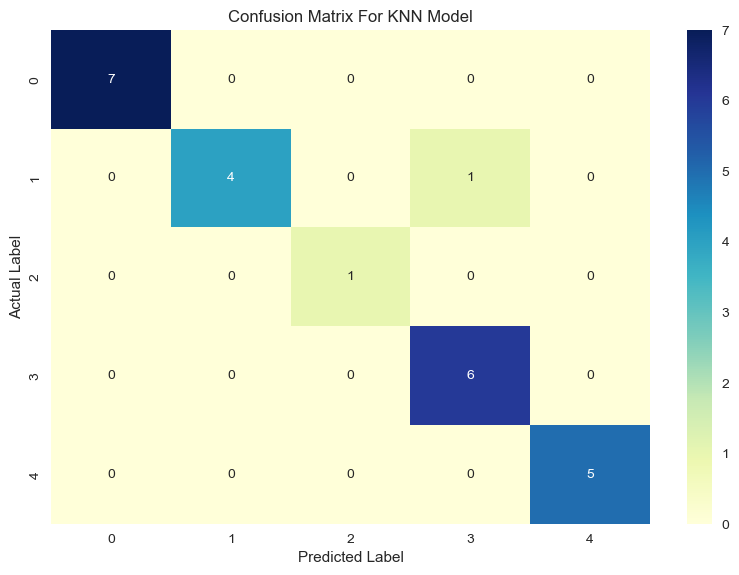

In [4]:
#...........................Using KNN Model.....................................
knn = KNeighborsClassifier(n_neighbors=5)
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)


KNN = GridSearchCV(knn, param_grid, cv = 5, scoring='accuracy', return_train_score=False,verbose=1)
KNN.fit(X_train, y_train)
KNN_Mbest = KNN.best_estimator_
KNN_pred_prob = KNN_Mbest.predict_proba(X_test)
KNN_Ypredict = KNN_Mbest.predict(X_test)

print("\nKNN Testing Accuracy:",metrics.accuracy_score(y_test, KNN_Ypredict))

# Plot KNN Accuracy
class_names=[0,1,2,3,4]        # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cnf_matrix = metrics.confusion_matrix(y_test, KNN_Ypredict)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix For KNN Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

 7.calculate the `precision score` of the classifier using `precision_score`.

In [9]:
# Calculating the precision score of classifier
print(f"Precision Score of the kNN is: {precision_score(y_test, KNN_Ypredict, average='weighted')}")

Precision Score of the kNN is: 0.9642857142857143


 8.**Applying  Decision Tree model**
 
 9.using `scikit-learn's DecisionTreeClassifier` and `GridSearchCV` to perform a grid search to find the best hyperparameters   for your decision tree model.
 
 10.Make dictionary of hyperparameters to search over, including the criterion to use for splitting, the maximum depth of the     tree, the minimum number of samples required to split an internal node, and the minimum number of samples required to be at a   leaf node. 

 11.After fitting the decision tree model with the training data and finding the best estimator using GridSearchCV, using the `predict_proba` method to get the predicted probabilities of the test set and predict method to get the predicted     labels of the test set. 

 12.use `scikit-learn's metrics` module to calculate the accuracy score of your decision tree model on the test set, and         plotting a confusion matrix using `seaborn` to visualize the performance of your model.

Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Decision Tree Testing Accuracy: 0.7083333333333334


d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\anaconda\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "d:\anaconda\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn(some

Text(0.5, 33.222222222222214, 'Predicted Label')

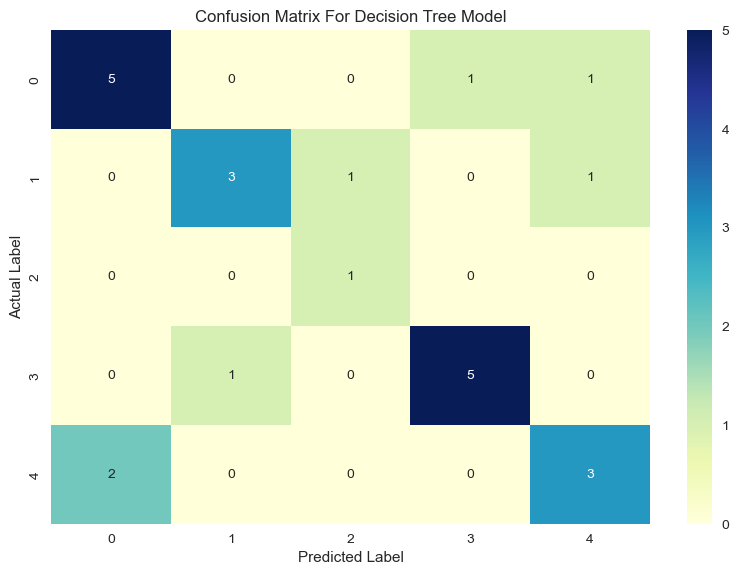

In [5]:
from sklearn.tree import DecisionTreeClassifier 
# .........................Using Decision Tree Model...........................
param_dict ={
    "criterion":['gini','entropy'],
    "max_depth":(150, 155, 160),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
 }
DT_model= DecisionTreeClassifier(random_state=42)
DT = GridSearchCV(DT_model,
                    param_grid=param_dict,
                    cv=5,                  # 5-Fold Cross Validation
                    verbose=1,
                    n_jobs=-1) 

DT.fit(X_train,y_train)
DT_Mbest = DT.best_estimator_
DT_pred_prob = DT_Mbest.predict_proba(X_test)
DT_Ypredict = DT_Mbest.predict(X_test)

print("\nDecision Tree Testing Accuracy:",metrics.accuracy_score(y_test, DT_Ypredict))

#Plot Decision Tree Accuracy
class_names=[0,1,2,3,4]        # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cnf_matrix = metrics.confusion_matrix(y_test, DT_Ypredict)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix For Decision Tree Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')


 13.calculate the `precision score` of the classifier using `precision_score`.

In [8]:
# Calculating the precision score of classifier
print(f"Precision Score of Decision Tree is: {precision_score(y_test, DT_Ypredict, average='weighted')}")

Precision Score of Decision Tree is: 0.71875


 14.**Applying Random Forest model**
 
 15.using `scikit-learn's RandomForestClassifier` and `GridSearchCV` to perform a grid search to find the best hyperparameters   for your random forest model.

 16.Make dictionary of hyperparameters to search over, including the number of trees in the forest, the maximum number of         features to consider for splitting each tree, the maximum depth of the tree, and the criterion to use for splitting.

 17.After fitting the random forest model with the training data and finding the best estimator using GridSearchCV, use the `predict_proba` method to get the predicted probabilities of the test set and predict method to get the predicted     labels of the test set.

 18.Finally, use `scikit-learn's metrics` module to calculate the accuracy score of your random forest model on the test set,  and plotting a confusion matrix using seaborn to visualize the performance of your model.


Random Forest Testing Accuracy: 0.8333333333333334


Text(0.5, 33.222222222222214, 'Predicted Label')

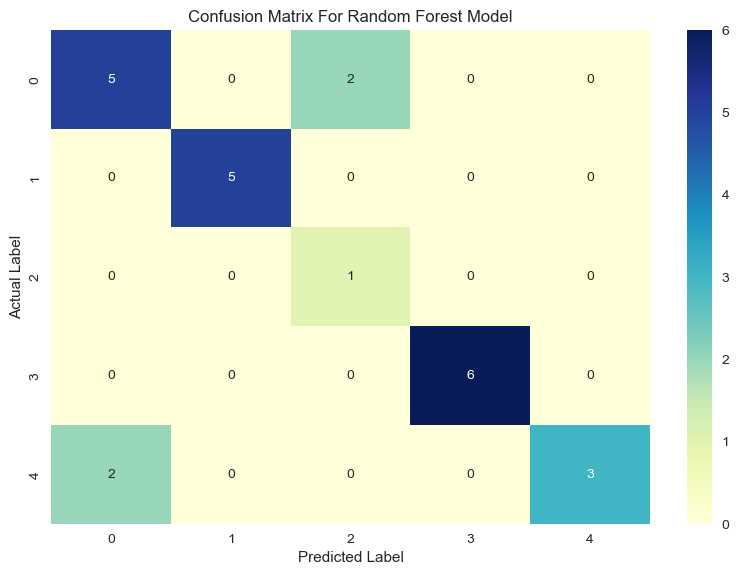

In [10]:
from sklearn.ensemble import RandomForestClassifier
# .........................Using Random Forest Model.....................
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
RF_model= RandomForestClassifier(random_state=42)
RF = GridSearchCV(estimator=RF_model, param_grid=param_grid, cv= 5)
RF.fit(X_train,y_train)
RF_Mbest = RF.best_estimator_
RF_pred_prob = RF_Mbest.predict_proba(X_test)
RF_Ypredict = RF_Mbest.predict(X_test)

print("\nRandom Forest Testing Accuracy:",metrics.accuracy_score(y_test, RF_Ypredict))

#Plot Random Forest Accuracy
class_names=[0,1,2,3,4]        # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cnf_matrix = metrics.confusion_matrix(y_test, RF_Ypredict)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()  
plt.title('Confusion Matrix For Random Forest Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

 19.calculate the `precision score` of the classifier using `precision_score`.

In [11]:
# Calculating the precision score of classifier
print(f"Precision Score of Random Forest is: {precision_score(y_test, RF_Ypredict, average='weighted')}")

Precision Score of Random Forest is: 0.888888888888889


 20.**Applying Logistic Regression  model**
 
 21.using `scikit-learn's LogisticRegression` and `GridSearchCV `to perform a grid search to find the best hyperparameters for your logistic regression model.

 22.Make dictionary of hyperparameters to search over, including the regularization penalty (L1 or L2) and the inverse of regularization strength (C).

 23.After fitting the logistic regression model with the training data and finding the best estimator using GridSearchCV, use the `predict_proba`method to get the predicted probabilities of the test set and predict method to get the predicted labels of the test set.

 24.Finally, use `scikit-learn's metrics module` to calculate the accuracy score of your logistic regression model on the test set, and plotting a confusion matrix using `seaborn` to visualize the performance of your model.

d:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result


Logistic Regression Testing Accuracy: 0.375


d:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 33.222222222222214, 'Predicted Label')

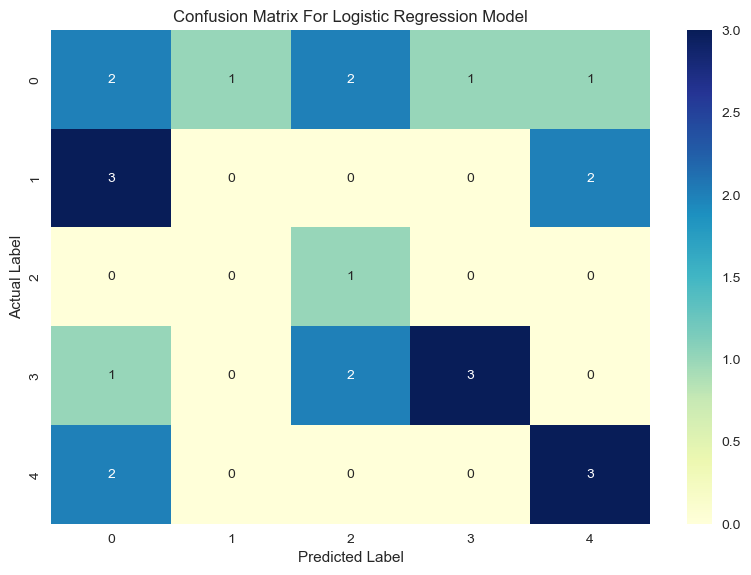

In [12]:
from sklearn.linear_model import LogisticRegression
# .........................Using Logistic Regression Model.....................
grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
LR_model= LogisticRegression(random_state=42)
LR = GridSearchCV(LR_model, param_grid=grid_values)
LR.fit(X_train,y_train)
LR_Mbest = LR.best_estimator_
LR_pred_prob = LR_Mbest.predict_proba(X_test)
LR_Ypredict = LR_Mbest.predict(X_test)
print("\nLogistic Regression Testing Accuracy:",metrics.accuracy_score(y_test, LR_Ypredict))

#Plot Logistic Regression Accuracy
class_names=[0,1,2,3,4]        # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cnf_matrix = metrics.confusion_matrix(y_test, LR_Ypredict)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix For Logistic Regression Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')


 25.calculate the `precision score` of the classifier using `precision_score`.

In [13]:
# Calculating the precision score of classifier
print(f"Precision Score of Logistic Regression is: {precision_score(y_test, LR_Ypredict, average='weighted')}")

Precision Score of Logistic Regression is: 0.3729166666666666


 26.**Applying SVM  model**
 
 27.using `scikit-learn's SVC (support vector machine)` and `GridSearchCV` to perform a grid search to find the best hyperparameters for your SVM model. 

 28.Make dictionary of hyperparameters to search over, including the regularization parameter C, the kernel type (in this case, radial basis function), and the kernel coefficient "gamma". 

 29.After setting an initial SVM model with specific hyperparameters, use GridSearchCV to perform a more comprehensive search. 

 30.After fitting the SVM model with the training data and finding the best estimator using GridSearchCV, you're using the `predict_prob`a method to get the predicted probabilities of the test set and predict method to get the predicted labels of the test set. 

 31.Finally, use `scikit-learn's metrics module` to calculate the accuracy score of your SVM model on the test set, and plotting a confusion matrix using `seaborn` to visualize the performance of your model.



Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.250 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.263 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.211 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.211 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.263 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.250 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.263 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.211 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.211 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.263 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.250 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

Text(0.5, 33.222222222222214, 'Predicted Label')

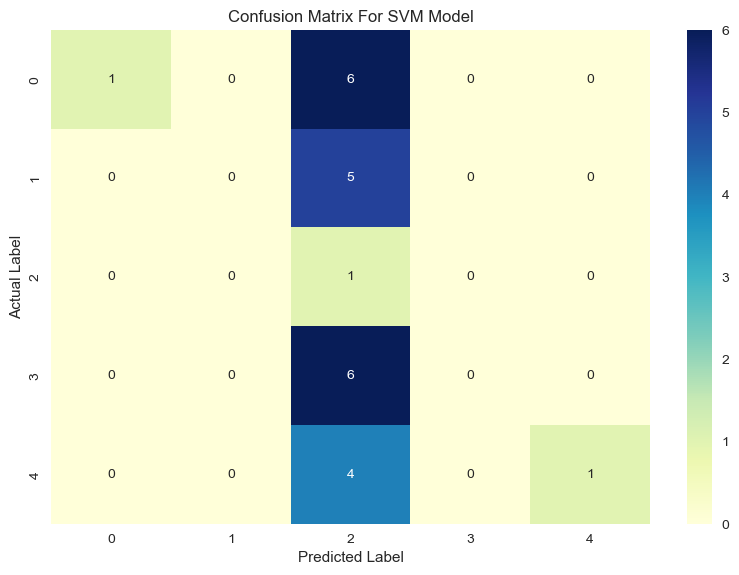

In [14]:
from sklearn.svm import SVC
#...........................Using SVM Model.....................................
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

svc = SVC(kernel = 'rbf', C = 8, gamma = 12/160, probability=True)
SVM = GridSearchCV(svc, param_grid, refit = True, verbose = 3) 
SVM.fit(X_train, y_train)
SVM_Mbest = SVM.best_estimator_
SVM_pred_prob = SVM_Mbest.predict_proba(X_test)
SVM_Ypredict = SVM_Mbest.predict(X_test)

print("\nSVM Testing Accuracy:",metrics.accuracy_score(y_test, SVM_Ypredict))

# Plot SVM Accuracy
class_names=[0,1,2,3,4]        # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cnf_matrix = metrics.confusion_matrix(y_test, SVM_Ypredict)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix For SVM Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

 32.calculate the `precision score` of the classifier using `precision_score`.

In [15]:
# Calculating the precision score of classifier
print(f"Precision Score of SVM is: {precision_score(y_test, SVM_Ypredict, average='weighted')}")

Precision Score of SVM is: 0.5018939393939394


d:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


33.**plot ROC curve for models**

34.use `scikit-learn's roc_curve` function to calculate the false positive rate, true positive rate, and thresholds for each of your models ***(decision tree, random forest, SVM, logistic regression, and KNN)*** on the test set. 

35.use `matplotlib` to plot the ROC curves for each model on the same plot, with false positive rate on the x-axis and true positive rate on the y-axis. 

36.the ROC curve shows the tradeoff between the true positive rate and false positive rate for a given classifier. The closer the curve is to the top left corner, the better the classifier's performance. 

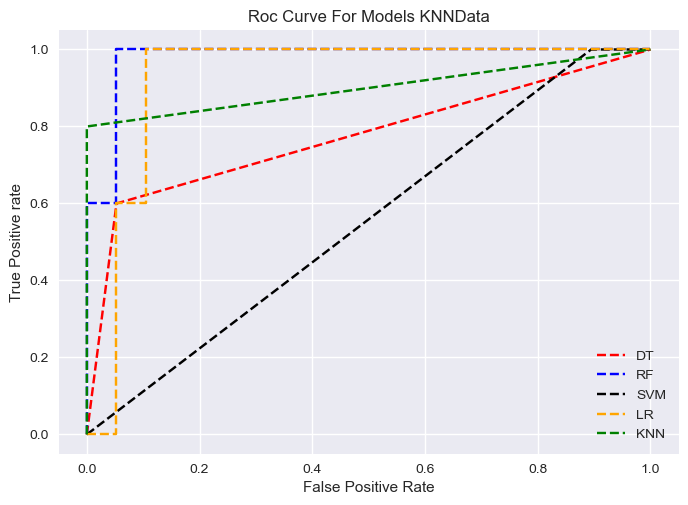

In [16]:
#....................roc curve for models................
DTfpr, DTtpr, DTthresh = roc_curve(y_test, DT_pred_prob[:,1], pos_label=1)
SVMfpr, SVMtpr, SVMthresh = roc_curve(y_test, SVM_pred_prob[:,1], pos_label=1)
RFfpr, RFtpr, RFthresh = roc_curve(y_test, RF_pred_prob[:,1], pos_label=1)
LRfpr, LRtpr, LRthresh = roc_curve(y_test, LR_pred_prob[:,1], pos_label=1)
KNNfpr, KNNtpr, KNNthresh = roc_curve(y_test, KNN_pred_prob[:,1], pos_label=1)
# plot roc curves
fig, ax = plt.subplots()
plt.plot(DTfpr, DTtpr, linestyle='--',color='red', label='DT')
plt.plot(RFfpr, RFtpr, linestyle='--',color='blue', label='RF')
plt.plot(SVMfpr, SVMtpr, linestyle='--',color='black', label='SVM')
plt.plot(LRfpr, LRtpr, linestyle='--',color='orange', label='LR')
plt.plot(KNNfpr, KNNtpr, linestyle='--',color='green', label='KNN')
plt.title('Roc Curve For Models KNNData')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

#To show all figures
plt.show()